1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [909]:
#https://github.com/TaghreedAssi/machinelearning-
from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

data's shape before split(569, 30)
data's shape after split(569, 2)


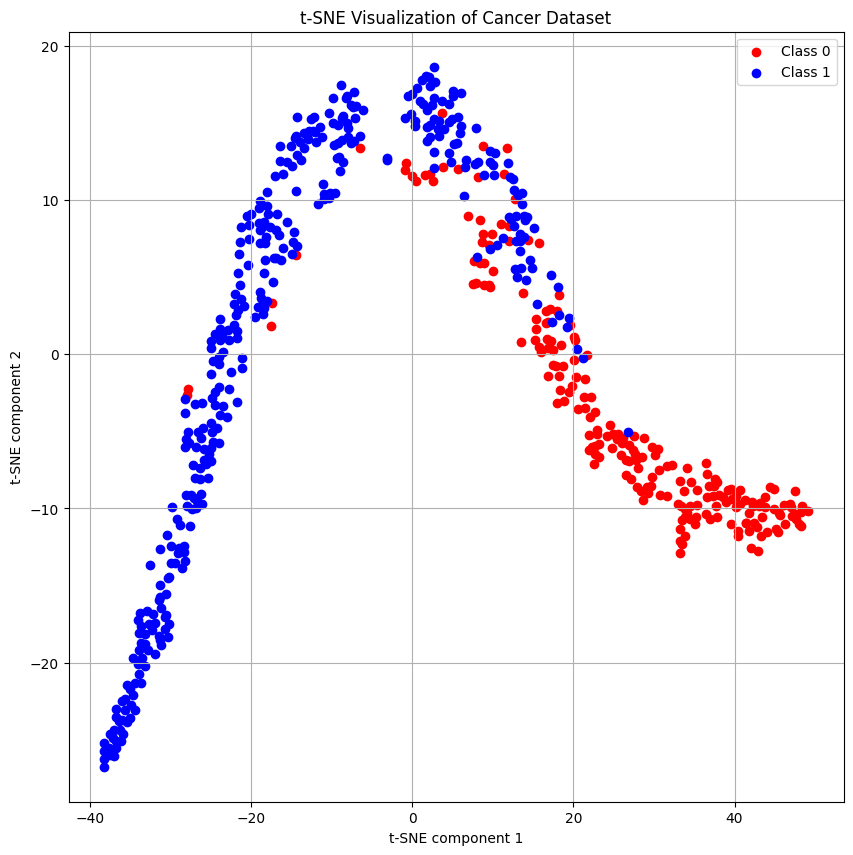

In [910]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("data's shape before split"+str(my_data.data.shape))
Z=my_data.target
W=my_data.data
tsne=TSNE(n_components=2,random_state=42)
W_tsne=tsne.fit_transform(W)
print("data's shape after split"+str(W_tsne.shape))
plt.figure(figsize=(10,10))
for i,c in zip(np.unique(Z),['red','blue']):
  plt.scatter(W_tsne[Z ==i,0],W_tsne[Z==i,1],c=c, label=f'Class {i}')
plt.title('t-SNE Visualization of Cancer Dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend()
plt.grid(True)
plt.show()

3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [911]:
from types import TracebackType

from sklearn.model_selection import train_test_split
X=pd.DataFrame(my_data.data,columns=my_data.feature_names)
Y=pd.DataFrame(my_data.target,columns=["class"])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.3,shuffle=True)
#print(X_train,Y_train)
#print(X_test,Y_test)







4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [912]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
model_decision_tree =DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=6)
model_decision_tree.fit(X_train,Y_train)
#plot_tree(model_decision_tree)




DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [913]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(random_state=0)#There are several experiments with the same results so I chose one of them.
model_random_forest.fit(X_train,Y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [914]:
from operator import le
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=100,random_state=0)#There are two experiments with the same results, so I chose one of them.
model_adaboost.fit(X_train,Y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=0)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [915]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Model Evaluation:\r\n")
models:dict={
    "Decision Tree":model_decision_tree,
    "Random Forest":model_random_forest,
   "AdaBoost":model_adaboost
}
winner="start"
max=0
for name,model in models.items():
  y_pred=model.predict(X_test)
  print(f"Model: {model.__class__.__name__}")
  print(f"Accuracy: {accuracy_score(Y_test,y_pred)}")
  print(f"Precision: {precision_score(Y_test,y_pred)}")
  Recall_score_of_model =recall_score(Y_test,y_pred)
  print(f"Recall: {recall_score(Y_test,y_pred)}")
  print(f"F1 Score: {f1_score(Y_test,y_pred)}")
  print(f"Confusion Matrix: {confusion_matrix(Y_test,y_pred)}")
  if(Recall_score_of_model>max):
    max=Recall_score_of_model
    winner=name
  elif Recall_score_of_model==max:
    winner=winner +"and "+name
  print("\n")
print("These models should have the ability to  identify and spot people with cancer,so I chose the decisive metric to be \"Recall_score\".")
print("Winner is:"+ winner)










Model Evaluation:

Model: DecisionTreeClassifier
Accuracy: 0.9649122807017544
Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1 Score: 0.9724770642201835
Confusion Matrix: [[ 59   4]
 [  2 106]]


Model: RandomForestClassifier
Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407
F1 Score: 0.9771689497716894
Confusion Matrix: [[ 59   4]
 [  1 107]]


Model: AdaBoostClassifier
Accuracy: 0.9824561403508771
Precision: 0.9906542056074766
Recall: 0.9814814814814815
F1 Score: 0.986046511627907
Confusion Matrix: [[ 62   1]
 [  2 106]]


These models should have the ability to  identify and spot people with cancer,so I chose the decisive metric to be "Recall_score".
Winner is:Random Forest
